<a href="https://colab.research.google.com/github/MaYuetong/MaYuetong/blob/main/%E2%80%9C%E7%BE%8E%E5%9B%BD%E4%BB%93%E7%BD%91%E8%A7%84%E5%88%92%E9%9C%80%E6%B1%82%E8%AE%A2%E5%8D%95%E9%87%8F%E5%92%8C%E5%B7%AE%E8%AF%84%E5%88%86%E6%9E%90_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

为分析美国现有仓网规划的用户需求5个本地仓的订单量（2024.10-2025.1），以及2024年第四季度客户对于物流时效的差评原因，现做以下分析


In [ ]:
# 安装必要的库
!pip install openpyxl matplotlib basemap
# 安装必要的库
!pip install pandas geopandas folium imgkit wkhtmltopdf python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 94.9 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 15.8 MB/s eta 0:00:00
  Created wheel for wkhtmltopdf: filename=wkhtmltopdf-0.2-py3-none-any.whl size=11135 sha256=e75c7e4e612374f69289efa9b3ccab067e39d31ca8a3235addd9ecf96a123780
  Stored in directory: /root/.cache/pip/wheels/61/e8/ba/34bacc3d874358dc176fd67cc97eeaa9a7fb54c55479258fb8
Successfully built wkhtmltopdf


In [ ]:
# 安装必要的库
!pip install pandas geopandas folium imgkit wkhtmltopdf
# 安装必要的库
!pip install pandas geopy

In [ ]:


import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from google.colab import files

# 上传 Excel 文件
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 读取 Excel 文件
xls = pd.ExcelFile(file_name)

# 地理编码器
geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 读取每个 sheet 并处理数据
complaint_types = xls.sheet_names
complaint_data = {}

for sheet in complaint_types:
    df = pd.read_excel(xls, sheet_name=sheet)
    df['location'] = df['运输城市'] + ', ' + df['运输省份']

    # 地理编码
    df['coordinates'] = df['location'].apply(lambda x: geocode(x) if pd.notnull(x) else None)
    df['latitude'] = df['coordinates'].apply(lambda x: x.latitude if x else None)
    df['longitude'] = df['coordinates'].apply(lambda x: x.longitude if x else None)

    # 保存处理后的数据
    complaint_data[sheet] = df

# 将带有坐标的数据保存为新的 Excel 文件
with pd.ExcelWriter('complaint_data_with_coordinates.xlsx') as writer:
    for sheet, df in complaint_data.items():
        df.to_excel(writer, sheet_name=sheet, index=False)

# 下载新的 Excel 文件
files.download('complaint_data_with_coordinates.xlsx')

Saving 北美2024年第四季度差评.xlsx to 北美2024年第四季度差评 (2).xlsx


Streaming output truncated to the last 5000 lines.
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/requests/sessions.py", line 589, in request
    resp = self.send(prep, **send_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/requests/sessions.py", line 703, in send
    r = adapter.send(request, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/requests/adapters.py", line 700, in send
    raise ConnectionError(e, request=request)
requests.exceptions.ConnectionError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Chicago%2C+IL&format=json&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x790bca417110>: Failed to establish a new connection: [Errno 111] Connection refused'))

During handling of the above exception, another exception occurred:

Tracebac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 安装必要的库
!pip install pandas geopandas matplotlib descartes

In [ ]:
!pip install python-Levenshtein
!pip install fuzzywuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import pandas as pd

# 上传文件
uploaded = files.upload()

# 读取Excel文件
file_name = list(uploaded.keys())[0]
sheets_dict = pd.read_excel(file_name, sheet_name=None)

# 合并所有sheet
combined_df = pd.concat(sheets_dict.values(), ignore_index=True)

# 查看合并后的数据
print("合并后的数据：")
print(combined_df.head())

Saving 北美2024年第四季度差评.xlsx to 北美2024年第四季度差评 (2).xlsx
合并后的数据：
            出库单号  差评层级1  差评层级2 差评层级22  差评层级3  物理仓名称              运输省份  \
0  HKS2411254NG6  发送货过程  发货速度慢  发货速度慢    NaN    前海仓           Alberta   
1  HKS2411264PYB  发送货过程  发货速度慢  发货速度慢    NaN    前海仓  British Columbia   
2  HKS24120451JZ  发送货过程  发货速度慢  发货速度慢    NaN  香港前置仓                LA   
3  HKS2412055228  发送货过程  发货速度慢  发货速度慢    NaN  香港前置仓                CA   
4  HKS24121258YP  发送货过程  发货速度慢  发货速度慢    NaN  香港前置仓                MI   

               运输城市  
0           Calgary  
1  Langley Township  
2           Pollock  
3        Sacramento  
4           Weidman  


In [ ]:
# 完整的美国州名与缩写映射表
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# 反向映射：完整州名 -> 缩写
state_mapping_reverse = {v: k for k, v in state_mapping.items()}

In [ ]:
def standardize_state_name(state_name):
    # 如果输入是缩写，转换为完整名称
    if state_name in state_mapping:
        return state_mapping[state_name]
    # 如果输入是完整名称，保持不变
    elif state_name in state_mapping_reverse:
        return state_name
    # 如果输入是非标准名称，尝试修复
    else:
        # 尝试通过模糊匹配修复（可选）
        from fuzzywuzzy import process
        match, score = process.extractOne(state_name, state_mapping.values())
        if score > 80:  # 匹配阈值
            return match
        else:
            return None  # 无法修复

# 应用标准化函数
combined_df['运输省份'] = combined_df['运输省份'].apply(standardize_state_name)

# 删除无法标准化的省份
combined_df = combined_df.dropna(subset=['运输省份'])

# 查看处理后的数据
print("处理后的数据：")
print(combined_df[['运输省份', '运输城市']].drop_duplicates())

处理后的数据：
               运输省份            运输城市
2         Louisiana         Pollock
3        California      Sacramento
4          Michigan         Weidman
5           Alabama      ENTERPRISE
6    South Carolina     Hardeeville
..              ...             ...
95          Florida  Tarpon Springs
97         Virginia       Rockville
98   North Carolina     Saint Pauls
99   North Carolina         Edenton
102           Texas    Collinsville

[77 rows x 2 columns]


In [ ]:
# 检查是否包含所有美国州
all_states = set(state_mapping.values())
processed_states = set(combined_df['运输省份'].unique())

missing_states = all_states - processed_states
if missing_states:
    print("以下州未在数据中出现：")
    print(missing_states)
else:
    print("所有美国州均已标准化！")

# 删除无法标准化的省份
combined_df = combined_df.dropna(subset=['运输省份'])

# 查看处理后的数据
print("处理后的省份名称：")
print(combined_df[['运输省份']].drop_duplicates())

以下州未在数据中出现：
{'Wisconsin', 'Wyoming', 'Connecticut', 'Missouri', 'Indiana', 'New Hampshire', 'North Dakota', 'Nevada', 'Arkansas', 'Iowa', 'Montana', 'Delaware', 'Alaska', 'South Dakota', 'Oregon', 'Tennessee', 'West Virginia', 'Oklahoma', 'Vermont', 'Utah', 'Colorado', 'Kansas', 'Idaho'}
处理后的省份名称：
              运输省份
2        Louisiana
3       California
4         Michigan
5          Alabama
6   South Carolina
8           Hawaii
9     Pennsylvania
10         Arizona
15           Maine
17         Florida
18            Ohio
20        New York
23           Texas
24        Virginia
26        Kentucky
32      Washington
39  North Carolina
41        Illinois
49       Minnesota
50      New Jersey
53    Rhode Island
58   Massachusetts
65         Georgia
67        Nebraska
71     Mississippi
77      New Mexico
89        Maryland


In [ ]:
!pip install geopy geonamescache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 67.5 MB/s eta 0:00:00


In [ ]:
from geopy.geocoders import Nominatim
from geonamescache import GeonamesCache

# 初始化地理编码器
geolocator = Nominatim(user_agent="geoapiExercises")

# 加载城市名称库
gc = GeonamesCache()
cities = gc.get_cities()

# 获取所有美国城市的标准化名称
us_cities = {city['name'] for city in cities.values() if city['countrycode'] == 'US'}

# 标准化城市名称
def standardize_city_name(city_name, state_name):
    """
    标准化城市名称：
    1. 转换为首字母大写格式。
    2. 检查是否在标准城市名称库中。
    3. 如果不在标准库中，尝试通过地理编码器获取标准名称。
    """
    # 转换为首字母大写格式
    city_name = city_name.title().strip()

    # 检查是否在标准城市名称库中
    if city_name in us_cities:
        return city_name
    else:
        # 尝试通过地理编码器获取标准名称
        try:
            location = geolocator.geocode(f"{city_name}, {state_name}, USA")
            if location:
                # 返回标准名称（通常是地理编码结果的第一个部分）
                return location.raw['display_name'].split(',')[0]
            else:
                return None  # 无法找到标准名称
        except:
            return None  # 地理编码失败

# 应用标准化函数
combined_df['运输城市'] = combined_df.apply(
    lambda row: standardize_city_name(row['运输城市'], row['运输省份']), axis=1
)

# 删除无法标准化的城市
combined_df = combined_df.dropna(subset=['运输城市'])

# 查看处理后的数据
print("处理后的城市名称：")
print(combined_df[['运输省份', '运输城市']].drop_duplicates())

处理后的城市名称：
               运输省份                 运输城市
3        California           Sacramento
5           Alabama           Enterprise
7        California       Imperial Beach
9      Pennsylvania           Greenville
10          Arizona                 Mesa
11        Louisiana         Prairieville
14       California               Walnut
15            Maine               Benton
16       California           Northridge
19     Pennsylvania             Lawrence
20         New York          Schenectady
21         Michigan               Taylor
23            Texas              Killeen
25       California     South Lake Tahoe
28          Florida         The Villages
31            Texas               Austin
32       Washington          Federal Way
33            Texas              Bedford
35          Florida            Palm City
36          Florida              Orlando
37           Hawaii              Wailuku
39   North Carolina                 Cary
41         Illinois              Huntley
43    

In [ ]:
# 统计每个州的差评次数
state_complaints = combined_df['运输省份'].value_counts().reset_index()
state_complaints.columns = ['State', 'Complaint Count']

# 统计每个城市的差评类型和次数
city_complaints = combined_df.groupby(['运输城市', '运输省份', '差评层级22']).size().unstack(fill_value=0).reset_index()

In [ ]:
# 检查是否有未标准化的省份
unmatched_states = combined_df[combined_df['运输省份'].isnull()]
if not unmatched_states.empty:
    print("以下省份未能标准化：")
    print(unmatched_states[['运输省份']].drop_duplicates())

# 检查是否有未标准化的城市
unmatched_cities = combined_df[combined_df['运输城市'].isnull()]
if not unmatched_cities.empty:
    print("以下城市未能标准化：")
    print(unmatched_cities[['运输省份', '运输城市']].drop_duplicates())

In [ ]:
# 选择需要的字段
final_df = combined_df[['出库单号', '差评层级22', '差评层级3', '物理仓名称', '运输省份', '运输城市']]

# 保存处理后的数据
output_file_name = 'processed_data_with_standardized_names.xlsx'
final_df.to_excel(output_file_name, index=False)

# 下载文件
files.download(output_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install geopandas matplotlib descartes geopy

In [ ]:
import geopandas as gpd

# 加载美国州级地图数据
usa_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

In [ ]:
from geopy.geocoders import Nominatim

# 初始化地理编码器
geolocator = Nominatim(user_agent="geoapiExercises")

def get_city_coordinates(city_name, state_name):
    """
    根据城市名称和州名获取经纬度。
    """
    try:
        location = geolocator.geocode(f"{city_name}, {state_name}, USA")
        if location:
            return location.longitude, location.latitude
        else:
            return None, None
    except:
        return None, None

# 为每个城市获取经纬度
combined_df['Longitude'], combined_df['Latitude'] = zip(*combined_df.apply(
    lambda row: get_city_coordinates(row['运输城市'], row['运输省份']), axis=1
))

# 删除无法获取经纬度的城市
combined_df = combined_df.dropna(subset=['Longitude', 'Latitude'])

# 查看处理后的数据
print("处理后的数据（包含经纬度）：")
print(combined_df.head())

处理后的数据（包含经纬度）：
Empty DataFrame
Columns: [出库单号, 差评层级1, 差评层级2, 差评层级22, 差评层级3, 物理仓名称, 运输省份, 运输城市, Longitude, Latitude]
Index: []


In [ ]:
# 安装依赖库
!pip install geopandas matplotlib descartes geopy

In [ ]:
# 完整的美国州名与缩写映射表
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    # 加拿大省份（如果需要）
    'ON': 'Ontario',
    'QC': 'Quebec',
    'BC': 'British Columbia',
    'AB': 'Alberta',
    'MB': 'Manitoba',
    'SK': 'Saskatchewan',
    'NS': 'Nova Scotia',
    'NB': 'New Brunswick',
    'NL': 'Newfoundland and Labrador',
    'PE': 'Prince Edward Island',
    'NT': 'Northwest Territories',
    'YT': 'Yukon',
    'NU': 'Nunavut'
}

# 反向映射：完整州名 -> 缩写
state_mapping_reverse = {v: k for k, v in state_mapping.items()}

# 标准化省份名称
def standardize_state_name(state_name):
    # 如果输入是缩写，转换为完整名称
    if state_name in state_mapping:
        return state_mapping[state_name]
    # 如果输入是完整名称，保持不变
    elif state_name in state_mapping_reverse:
        return state_name
    # 如果输入是非标准名称，尝试修复
    else:
        # 尝试通过模糊匹配修复（可选）
        from fuzzywuzzy import process
        match, score = process.extractOne(state_name, state_mapping.values())
        if score > 80:  # 匹配阈值
            return match
        else:
            return None  # 无法修复

# 应用标准化函数
combined_df['运输省份'] = combined_df['运输省份'].apply(standardize_state_name)

# 删除无法标准化的省份
combined_df = combined_df.dropna(subset=['运输省份'])

# 查看处理后的省份名称
print("处理后的省份名称：")
print(combined_df[['运输省份']].drop_duplicates())

处理后的省份名称：
                运输省份
0            Alberta
1   British Columbia
2          Louisiana
3         California
4           Michigan
5            Alabama
6     South Carolina
8             Hawaii
9       Pennsylvania
10           Arizona
15             Maine
17           Florida
18              Ohio
20          New York
23             Texas
24          Virginia
26          Kentucky
32        Washington
39    North Carolina
41          Illinois
49         Minnesota
50        New Jersey
53      Rhode Island
58     Massachusetts
60           Ontario
65           Georgia
67          Nebraska
71       Mississippi
77        New Mexico
89          Maryland


In [ ]:
!pip install geopy geonamescache

In [ ]:
from geopy.geocoders import Nominatim
from geonamescache import GeonamesCache

# 初始化地理编码器
geolocator = Nominatim(user_agent="geoapiExercises")

# 加载城市名称库
gc = GeonamesCache()
cities = gc.get_cities()

# 获取所有美国城市的标准化名称
us_cities = {city['name'] for city in cities.values() if city['countrycode'] == 'US'}

# 标准化城市名称
def standardize_city_name(city_name, state_name):
    """
    标准化城市名称：
    1. 转换为首字母大写格式。
    2. 检查是否在标准城市名称库中。
    3. 如果不在标准库中，尝试通过地理编码器获取标准名称。
    """
    # 转换为首字母大写格式
    city_name = city_name.title().strip()

    # 检查是否在标准城市名称库中
    if city_name in us_cities:
        return city_name
    else:
        # 尝试通过地理编码器获取标准名称
        try:
            location = geolocator.geocode(f"{city_name}, {state_name}, USA")
            if location:
                # 返回标准名称（通常是地理编码结果的第一个部分）
                return location.raw['display_name'].split(',')[0]
            else:
                return None  # 无法找到标准名称
        except:
            return None  # 地理编码失败

# 应用标准化函数
combined_df['运输城市'] = combined_df.apply(
    lambda row: standardize_city_name(row['运输城市'], row['运输省份']), axis=1
)

# 删除无法标准化的城市
combined_df = combined_df.dropna(subset=['运输城市'])

# 查看处理后的城市名称
print("处理后的城市名称：")
print(combined_df[['运输省份', '运输城市']].drop_duplicates())

处理后的城市名称：
               运输省份                 运输城市
3        California           Sacramento
5           Alabama           Enterprise
7        California       Imperial Beach
9      Pennsylvania           Greenville
10          Arizona                 Mesa
11        Louisiana         Prairieville
14       California               Walnut
15            Maine               Benton
16       California           Northridge
19     Pennsylvania             Lawrence
20         New York          Schenectady
21         Michigan               Taylor
23            Texas              Killeen
25       California     South Lake Tahoe
28          Florida         The Villages
31            Texas               Austin
32       Washington          Federal Way
33            Texas              Bedford
35          Florida            Palm City
36          Florida              Orlando
37           Hawaii              Wailuku
39   North Carolina                 Cary
41         Illinois              Huntley
43    

In [ ]:
# 检查是否有未标准化的省份
unmatched_states = combined_df[combined_df['运输省份'].isnull()]
if not unmatched_states.empty:
    print("以下省份未能标准化：")
    print(unmatched_states[['运输省份']].drop_duplicates())

# 检查是否有未标准化的城市
unmatched_cities = combined_df[combined_df['运输城市'].isnull()]
if not unmatched_cities.empty:
    print("以下城市未能标准化：")
    print(unmatched_cities[['运输省份', '运输城市']].drop_duplicates())

In [ ]:
# 保存处理后的数据
output_file_name = 'processed_data_with_standardized_names.xlsx'
combined_df.to_excel(output_file_name, index=False)

# 下载文件
files.download(output_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

请上传你的数据文件（Excel格式）：


<ipython-input-39-0bc5530e19e7>:63: UserWarning:

Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from font(s) DejaVu Sans.

<ipython-input-39-0bc5530e19e7>:63: UserWarning:

Glyph 33694 (\N{CJK UNIFIED IDEOGRAPH-839E}) missing from font(s) DejaVu Sans.

<ipython-input-39-0bc5530e19e7>:63: UserWarning:

Glyph 20179 (\N{CJK UNIFIED IDEOGRAPH-4ED3}) missing from font(s) DejaVu Sans.

<ipython-input-39-0bc5530e19e7>:63: UserWarning:

Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from font(s) DejaVu Sans.

<ipython-input-39-0bc5530e19e7>:63: UserWarning:

Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.

<ipython-input-39-0bc5530e19e7>:63: UserWarning:

Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.

<ipython-input-39-0bc5530e19e7>:63: UserWarning:

Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.

<ipython-input-39-0bc5530e19e7>:63: UserWarning:

Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-99

Saving processed_data_with_standardized_names (1).xlsx to processed_data_with_standardized_names (1) (2).xlsx
数据已成功加载！


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 33694 (\N{CJK UNIFIED IDEOGRAPH-839E}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 20179 (\N{CJK UNIFIED IDEOGRAPH-4ED3}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.

/usr

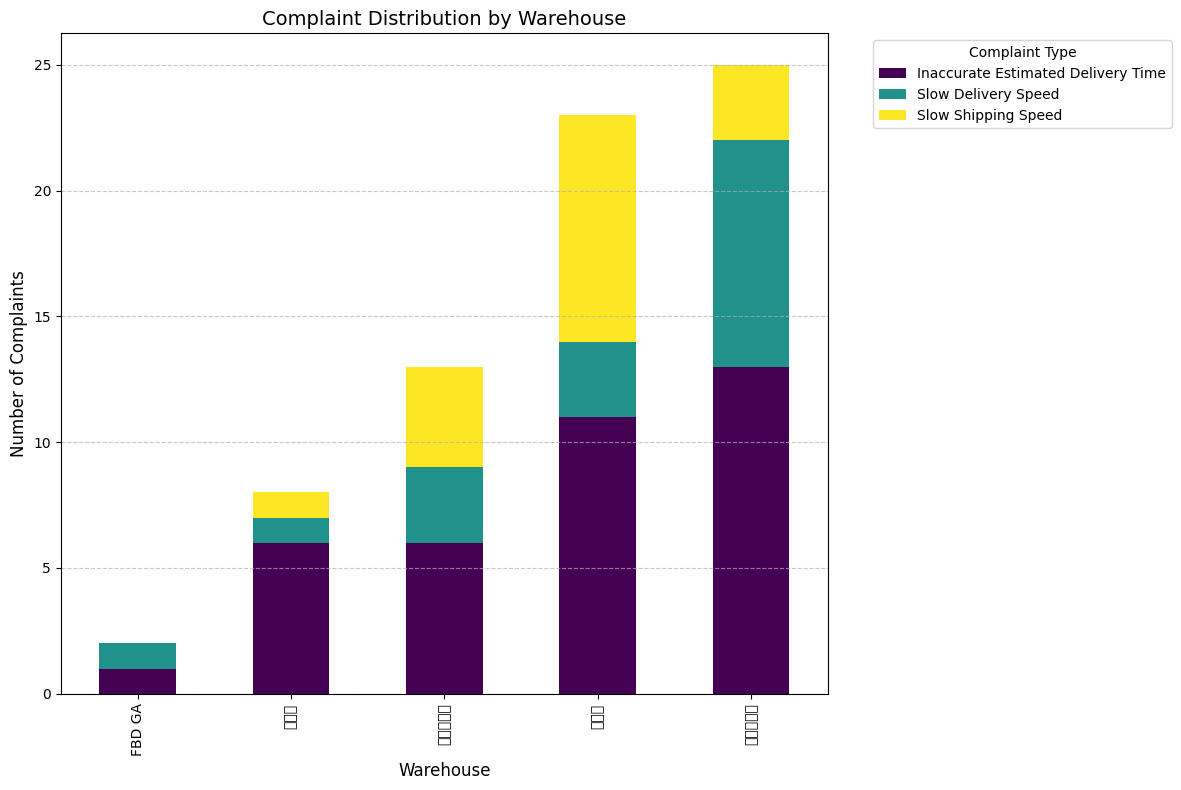

ValueError: Unknown format code 'd' for object of type 'float'

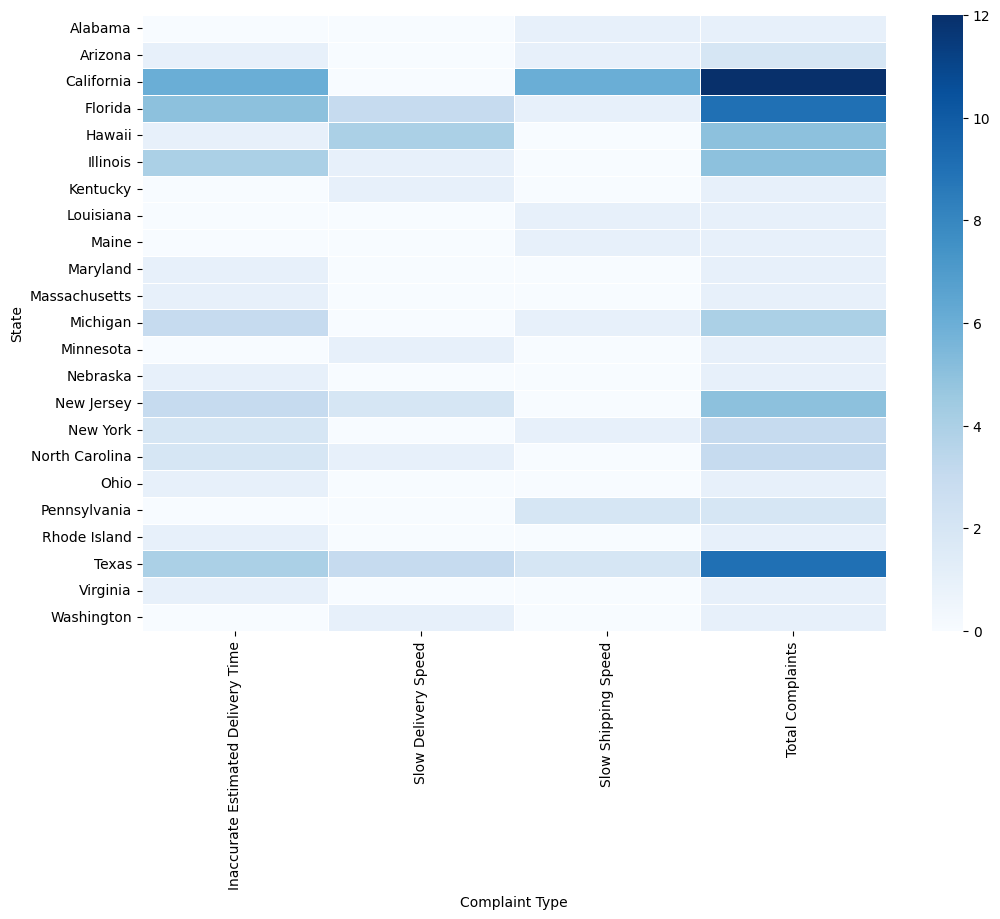

In [ ]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

# 设置中文显示（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用于显示负号

# 1. 上传数据文件
from google.colab import files

print("请上传你的数据文件（Excel格式）：")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # 获取上传文件的名称

# 2. 读取Excel文件
try:
    df = pd.read_excel(file_name)
    print("数据已成功加载！")
except Exception as e:
    print(f"加载数据时出错：{e}")

# 3. 数据预处理
# 确保列名正确
expected_columns = ['出库单号', '差评层级2', '差评层级3', '物理仓名称', '运输省份', '运输城市']
if not all(col in df.columns for col in expected_columns):
    raise ValueError("数据列名不匹配，请检查文件格式！")

# 去除空值
df = df.dropna(subset=['差评层级2', '运输省份', '运输城市'])

# 翻译列名和投诉类型为英文
translation_dict = {
    '出库单号': 'Order Number',
    '差评层级2': 'Complaint Type',
    '差评层级3': 'Complaint Detail',
    '物理仓名称': 'Warehouse',
    '运输省份': 'State',
    '运输城市': 'City',
    '发货速度慢': 'Slow Shipping Speed',
    '送货速度慢': 'Slow Delivery Speed',
    '预计送达时间不准确': 'Inaccurate Estimated Delivery Time'
}

df = df.rename(columns=translation_dict)
df['Complaint Type'] = df['Complaint Type'].replace(translation_dict)

# 4. 可视化：仓库与投诉类型的分布
complaint_counts = df.groupby(['Warehouse', 'Complaint Type']).size().unstack().fillna(0)

# 使用Matplotlib绘制柱状图
fig, ax = plt.subplots(figsize=(12, 8))
complaint_counts.plot(kind='bar', ax=ax, stacked=True, colormap='viridis')
ax.set_title('Complaint Distribution by Warehouse', fontsize=14)
ax.set_xlabel('Warehouse', fontsize=12)
ax.set_ylabel('Number of Complaints', fontsize=12)
ax.legend(title='Complaint Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. 可视化：不同投诉类型在各州的分布
state_complaints = df.groupby(['State', 'Complaint Type']).size().unstack().fillna(0)
state_complaints['Total Complaints'] = state_complaints.sum(axis=1)

# 使用Seaborn绘制热力图
plt.figure(figsize=(12, 8))
sns.heatmap(state_complaints, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Complaint Distribution by State', fontsize=14)
plt.xlabel('Complaint Type', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

# 6. 地图可视化：投诉的地理分布
# 获取城市和州的经纬度
geolocator = Nominatim(user_agent="complaint_map")

def get_coordinates(city, state):
    try:
        location = geolocator.geocode(f"{city}, {state}, USA")
        return location.latitude, location.longitude
    except:
        return np.nan, np.nan

df['Latitude'], df['Longitude'] = zip(*df.apply(lambda row: get_coordinates(row['City'], row['State']), axis=1))

# 创建地图
map_center = [37.0902, -95.7129]  # 美国中心点
mymap = folium.Map(location=map_center, zoom_start=4, tiles='Stamen Terrain', attr='Map tiles by Stamen Design')

# 添加投诉标记
for _, row in df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            [row['Latitude'], row['Longitude']],
            radius=5,
            popup=f"{row['City']}, {row['State']}<br>Warehouse: {row['Warehouse']}<br>Complaint: {row['Complaint Type']}",
            fill=True,
            fill_color='red',
            color='transparent',
            fill_opacity=0.7
        ).add_to(mymap)

# 显示地图
mymap

请上传你的数据文件（Excel格式）：


Saving processed_data_with_standardized_names (1).xlsx to processed_data_with_standardized_names (1) (5).xlsx
数据已成功加载！


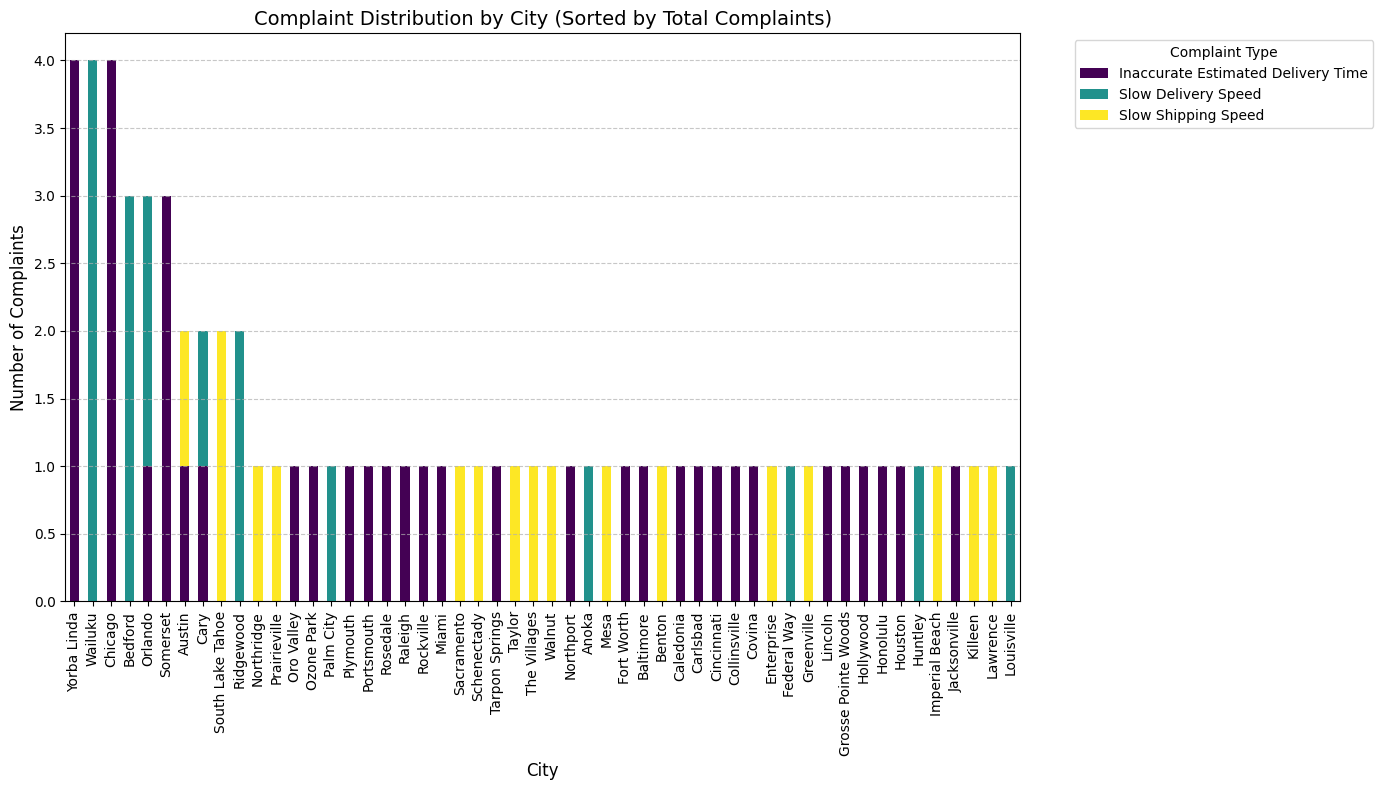

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

# 设置中文显示（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用于显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用于显示负号

# 1. 上传数据文件
from google.colab import files

print("请上传你的数据文件（Excel格式）：")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # 获取上传文件的名称

# 2. 读取Excel文件
try:
    df = pd.read_excel(file_name)
    print("数据已成功加载！")
except Exception as e:
    print(f"加载数据时出错：{e}")

# 3. 数据预处理
expected_columns = ['出库单号', '差评层级2', '差评层级3', '物理仓名称', '运输省份', '运输城市']
if not all(col in df.columns for col in expected_columns):
    raise ValueError("数据列名不匹配，请检查文件格式！")

df = df.dropna(subset=['差评层级2', '运输省份', '运输城市'])

# 翻译列名和投诉类型为英文
translation_dict = {
    '出库单号': 'Order Number',
    '差评层级2': 'Complaint Type',
    '差评层级3': 'Complaint Detail',
    '物理仓名称': 'Warehouse',
    '运输省份': 'State',
    '运输城市': 'City',
    '发货速度慢': 'Slow Shipping Speed',
    '送货速度慢': 'Slow Delivery Speed',
    '预计送达时间不准确': 'Inaccurate Estimated Delivery Time',
    '香港前置仓': 'Hong Kong Pre-Warehouse',
    '东莞仓': 'Dongguan Warehouse',
    '美西仓': 'West USA Warehouse',
    '美东前置仓': 'East USA Pre-Warehouse'
}

df = df.rename(columns=translation_dict)
df['Complaint Type'] = df['Complaint Type'].replace(translation_dict)
df['Warehouse'] = df['Warehouse'].replace(translation_dict)

# 4. 按城市统计投诉类型
city_complaints = df.groupby(['City', 'Complaint Type']).size().unstack().fillna(0)

# 4.1 按投诉总数对城市排序
city_complaints['Total Complaints'] = city_complaints.sum(axis=1)
city_complaints = city_complaints.sort_values(by='Total Complaints', ascending=False)

# 5. 绘制城市级别的柱状图（按投诉总数排序）
fig, ax = plt.subplots(figsize=(14, 8))
city_complaints.drop(columns=['Total Complaints']).plot(kind='bar', ax=ax, stacked=True, colormap='viridis')
ax.set_title('Complaint Distribution by City (Sorted by Total Complaints)', fontsize=14)
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Number of Complaints', fontsize=12)
ax.legend(title='Complaint Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_facecolor('none')  # 设置背景透明
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json

In [ ]:
# 上传数据文件
from google.colab import files
print("请上传你的数据文件（Excel格式）：")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 读取数据
df = pd.read_excel(file_name)
print("数据已成功加载！")

# 翻译列名和投诉类型为英文
translation_dict = {
    '出库单号': 'Order Number',
    '差评层级2': 'Complaint Type',
    '差评层级3': 'Complaint Detail',
    '物理仓名称': 'Warehouse',
    '运输省份': 'State',
    '运输城市': 'City',
    '发货速度慢': 'Slow Shipping Speed',
    '送货速度慢': 'Slow Delivery Speed',
    '预计送达时间不准确': 'Inaccurate Estimated Delivery Time',
    '香港前置仓': 'Hong Kong Pre-Warehouse',
    '东莞仓': 'Dongguan Warehouse',
    '美西仓': 'West USA Warehouse',
    '美东前置仓': 'East USA Pre-Warehouse'
}
df = df.rename(columns=translation_dict)
df['Complaint Type'] = df['Complaint Type'].replace(translation_dict)
df['Warehouse'] = df['Warehouse'].replace(translation_dict)

请上传你的数据文件（Excel格式）：


Saving processed_data_with_standardized_names (1).xlsx to processed_data_with_standardized_names (1) (6).xlsx
数据已成功加载！


In [ ]:
geolocator = Nominatim(user_agent="complaint_map")

def get_coordinates(city, state):
    try:
        location = geolocator.geocode(f"{city}, {state}, USA")
        return location.latitude, location.longitude
    except:
        return None, None

df['Latitude'], df['Longitude'] = zip(*df.apply(lambda row: get_coordinates(row['City'], row['State']), axis=1))

In [ ]:
# 按州统计投诉类型
state_complaints = df.groupby(['State', 'Complaint Type']).size().unstack().fillna(0)
state_complaints['Total Complaints'] = state_complaints.sum(axis=1)

# 准备州中心点
state_centers = {
    'Alabama': [32.3182, -86.9023],
    'Alaska': [64.2008, -149.4937],
    'Arizona': [34.0489, -111.0937],
    'Arkansas': [34.7983, -92.1407],
    'California': [36.7783, -119.4179],
    'Colorado': [39.5501, -105.7821],
    'Connecticut': [41.5837, -72.7618],
    'Delaware': [39.7098, -75.5535],
    'Florida': [27.9944, -81.7603],
    'Georgia': [32.7431, -83.4411],
    'Hawaii': [21.0943, -157.5291],
    'Idaho': [44.0682, -114.7420],
    'Illinois': [40.6331, -89.3985],
    'Indiana': [39.8647, -86.2604],
    'Iowa': [41.8780, -93.0977],
    'Kansas': [38.5111, -96.8005],
    'Kentucky': [37.6690, -84.6514],
    'Louisiana': [30.9843, -91.9623],
    'Maine': [44.6074, -69.3853],
    'Maryland': [39.0724, -76.8024],
    'Massachusetts': [42.2373, -71.5314],
    'Michigan': [43.3266, -84.5361],
    'Minnesota': [45.7326, -93.9196],
    'Mississippi': [32.3547, -89.3985],
    'Missouri': [38.4623, -92.2945],
    'Montana': [46.9048, -110.4545],
    'Nebraska': [41.1254, -98.2898],
    'Nevada': [39.3288, -116.6346],
    'New Hampshire': [43.4108, -71.5653],
    'New Jersey': [40.3140, -74.5089],
    'New Mexico': [34.8405, -106.2482],
    'New York': [42.1657, -74.9481],
    'North Carolina': [35.7596, -79.0193],
    'North Dakota': [47.5362, -99.7930],
    'Ohio': [40.3888, -82.7649],
    'Oklahoma': [35.5657, -96.9294],
    'Oregon': [44.5672, -122.1269],
    'Pennsylvania': [40.5773, -77.2640],
    'Rhode Island': [41.6809, -71.5116],
    'South Carolina': [33.8361, -80.9451],
    'South Dakota': [44.2997, -99.4398],
    'Tennessee': [35.7478, -86.6923],
    'Texas': [31.9686, -99.9018],
    'Utah': [39.3288, -111.0937],
    'Vermont': [44.2664, -72.5721],
    'Virginia': [37.5337, -78.6569],
    'Washington': [47.4009, -122.8927],
    'West Virginia': [38.4913, -80.9840],
    'Wisconsin': [44.2563, -89.6385],
    'Wyoming': [43.0759, -107.2903]
}

# 创建地图
mymap = folium.Map(location=map_center, zoom_start=4, tiles='Stamen Terrain')

# 添加州边界
folium.GeoJson(
    usa_states_geojson,
    name='State Boundaries',
    style_function=lambda x: {'fillColor': 'none', 'color': 'black', 'weight': 1}
).add_to(mymap)

# 添加州饼图
for state, coords in state_centers.items():
    if state in state_complaints.index:
        complaints = state_complaints.loc[state].drop('Total Complaints')
        folium.PieChart(
            location=coords,
            radius=10,
            data=complaints,
            colors=['red', 'blue', 'green'],
            legend_name=f"Complaint Types in {state}"
        ).add_to(mymap)

# 显示地图
mymap

In [ ]:
!pip install pyecharts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.7/153.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 12.3 MB/s eta 0:00:00


In [ ]:
!pip install pandas plotly openpyxl

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from google.colab import files

# 上传Excel文件
uploaded = files.upload()

# 读取Excel文件
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# 预处理数据
# 选择需要的列
df = df[['物理仓名称', '差评层级2', '运输省份']]
df.dropna(inplace=True)

# 计算每个仓库、差评类型和州的出现次数
warehouse_counts = df['物理仓名称'].value_counts()
feedback_counts = df['差评层级2'].value_counts()
state_counts = df['运输省份'].value_counts()

# 获取排名
warehouse_rank = {name: idx for idx, name in enumerate(warehouse_counts.index)}
feedback_rank = {name: idx + len(warehouse_rank) for idx, name in enumerate(feedback_counts.index)}
state_rank = {name: idx + len(warehouse_rank) + len(feedback_rank) for idx, name in enumerate(state_counts.index)}

# 根据州的出现次数排序
sorted_states = state_counts.index.tolist()  # 获取州的列表
state_counts_sorted = state_counts.sort_values(ascending=False)  # 按出现次数排序
state_rank = {name: idx + len(warehouse_rank) + len(feedback_rank) for idx, name in enumerate(state_counts_sorted.index)}

# 生成桑基图的源和目标
source = []
target = []
values = []
colors = []  # 保存颜色信息

# 定义颜色映射
color_map = {
    '发货速度慢': '#FFB6B9',
    '送货速度慢': '#BBDED6',
    '预计送达时间不准确': '#61C0BF',
    # 添加更多反馈层级及其对应颜色，如果有的话
}

# 数据流向：仓库 -> 差评类型
for _, row in df.iterrows():
    source.append(warehouse_rank[row['物理仓名称']])
    target.append(feedback_rank[row['差评层级2']])
    values.append(2)  # 每个关系的值为1
    colors.append(color_map[row['差评层级2']])  # 获取差评类型的颜色

# 数据流向：差评类型 -> 州
for _, row in df.iterrows():
    source.append(feedback_rank[row['差评层级2']])
    target.append(state_rank[row['运输省份']])
    values.append(2)  # 每个关系的值
    colors.append(color_map[row['差评层级2']])  # 继续使用相同颜色

# 汇总桑基图数据
all_labels = list(warehouse_rank.keys()) + list(feedback_rank.keys()) + list(state_rank.keys())
link = {'source': source, 'target': target, 'value': values}

# 创建桑基图
fig = go.Figure(go.Sankey(
    node=dict(
        pad=18,
        thickness=40,
        line=dict(color='white', width=0.5),
        label=all_labels,
        color=['#DEB6AB'] * len(warehouse_rank) + ['#AC7D88'] * len(feedback_rank) + ['#85586F'] * len(state_rank)  # 设置节点颜色
    ),
    link=dict(
        source=source,
        target=target,
        value=values,
        color=colors  # 设置流向线的颜色
    )
))

# 按照州的出现次数进行排序并重新排列节点的标签
sorted_states = state_counts.index.tolist()
sorted_labels = list(warehouse_rank.keys()) + list(feedback_rank.keys()) + sorted_states


fig.update_layout(title_text="仓库流向差评类型与运输省份的三层桑基图", font=dict(
        size=20,           # 字体大小
        color="black",     # 字体颜色
        family="Arial, Bold"  # 字体类型，这里可以指定为粗体
    ),height=800, width=1000   )
fig.show()

Saving processed_data_with_standardized_names (1).xlsx to processed_data_with_standardized_names (1) (26).xlsx
